<b>1)  Consider data set 1 (ds1.csv). The data set comprises observations
(the Five xs) along with three sequences that may or may not be generated
from the observations.<b>

In [1]:
import pandas as pd

ds1=pd.read_csv('C:/Users/mfrid/Downloads/Copy of ds1.csv').set_index('Unnamed: 0')
ds1.head()

,x1,x2,x3,x5,x6,ya,yb,yc
Unnamed: 0,,,,,,,,
1,2.642583,-1.715220,1.909334,0.027139,-3.447187,13.630850,1.828765,0.008386
2,4.588761,-2.507543,4.239107,1.704150,-2.782809,7.834582,2.162110,0.000008
3,7.919796,-5.108415,3.039451,0.992815,5.551587,-5.107041,2.797083,-0.000005
4,2.616757,-2.124040,2.855570,0.990079,1.694697,19.015046,1.953887,0.038017
5,3.300856,-5.159684,0.764544,0.143581,3.277496,-9.818862,1.922446,0.001178


In [2]:
ds1.describe()

,x1,x2,x3,x5,x6,ya,yb,yc
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,5.011059,-3.005565,2.500593,0.999136,0.000647,3.827867,2.111854,1.022765e-04
std,2.873568,2.000799,1.752906,1.002006,4.663860,18.438514,0.769306,3.121215e-02
min,0.000015,-12.498524,-3.489212,0.000003,-13.885453,-64.021995,-0.523672,-5.433613e-01
25%,2.536309,-4.353844,1.189920,0.285629,-2.611943,-8.998020,1.580212,-2.423158e-03
50%,5.022191,-3.002649,2.503764,0.690903,-0.000611,2.666992,2.231057,-5.670000e-10
75%,7.486275,-1.649283,3.802236,1.386862,2.621841,15.579687,2.733318,2.476745e-03
max,9.999887,6.089820,8.679097,15.102966,13.924740,107.713997,3.841363,8.183882e-01


<b>a) Describe the data set in a few sentences.</b><br>

Summary statistics are in the table above. <br>

There are 100,000 records in the data. The means for the 5 respective observations are: 5,-3,2.5,1,0 and the means for the respective sequences are 3.8,2.11,0. Observation x6 has the highest Standard Deviation and x5 has the lowest with a Standard Deviation of 1. The Standard Deviations for the sequences ya,yb and yc are respectively: 18.44, .77, .03.

In [3]:
from sklearn.model_selection import train_test_split

Xa_train, Xa_test, ya_train, ya_test = train_test_split(ds1.ix[:,:5], ds1[['ya']], test_size=0.20, random_state=42)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(ds1.ix[:,:5], ds1[['yb']], test_size=0.20, random_state=42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(ds1.ix[:,:5], ds1[['yc']], test_size=0.20, random_state=42)

from sklearn import linear_model

regr1 = linear_model.LassoCV()
regr2 = linear_model.LassoCV()
regr3 = linear_model.LassoCV()

regr1.fit(Xa_train, ya_train)
regr2.fit(Xb_train, yb_train)
regr3.fit(Xc_train, yc_train)

y1_pred = regr1.score(Xa_test,ya_test)
y2_pred = regr2.score(Xb_test,yb_test)
y3_pred = regr3.score(Xc_test,yc_test)

print(y1_pred,regr1.coef_)
print(y2_pred,regr2.coef_)
print(y3_pred,regr3.coef_)

C:\Users\mfrid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mfrid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mfrid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mfrid\Anaconda3\lib\site-packages\sklearn\linear_mode

0.677349912504 [ 2.52764701  6.21835684  0.91351279  0.          0.00772946]
0.895293104194 [ 0.25266195 -0.          0.          0.          0.        ]
-0.000121540208666 [-0. -0. -0.  0.  0.]


<b>b) Try to come up with a predictive model, e.g.  y = f(x_1 + … + x_n)
for each y sequence.   Describe your model and how you came up with
them.   What (if any) are the predictive variables?  How good would
you say each of your models is?</b>

Using a Linear Regression model with cross-validation (80/20 train-test split) and lasso-regularization for each model above I obtained the following models:

ya = 2.53*x1 + 6.22*x2 + .91*x3 + .01*x6 <br>
yb = .25x1<br>
yc = No predictors <br>

Using the R-squared statistic to measure the Goodness-of-Fit for each model, where a value of 0% explains none of the variability of the response data around its mean and value of 100% explains all the variability of the response data around its mean we get:

Model ya R-squared = 68%, Model is okay and seems to be somewhat accurate using 4 observations<br>
Model yb R-squared = 90%, Model is excellent and is very accurate using just 1 observation<br>
Model yc R-squared = 0%, Model is unable to predict the sequence since there is not a strong relationship between the observations and sequence.

<b>2) Consider data set 2 (ds2.csv).  The data asset comprises a set of
observations (ys).</b>

In [4]:
ds2=pd.read_csv('C:/Users/mfrid/Downloads/Copy of ds2.csv').set_index('Unnamed: 0')
ds2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Unnamed: 0,,,,,,,,,,
1,23.778224,13.319974,15.565124,-3.713626,7.296793,-19.371013,-0.894130,-6.110282,-28.959316,2.851336
2,16.602950,23.311281,21.099052,-0.304154,-3.218990,2.357643,12.027277,7.070349,-5.762185,-23.050198
3,12.084683,19.710443,9.837102,-1.081918,-1.201942,9.738019,16.125920,19.119391,-15.582122,-12.292535
4,13.044534,10.749040,5.884407,-11.703525,-4.134358,-22.344666,-1.263349,0.493711,-15.305347,6.799087
5,8.314115,6.748794,5.388535,-0.000290,-4.724787,-16.346812,3.293600,-10.848273,-17.285491,6.034214


In [5]:
ds2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8.677829,11.716801,9.252817,-2.679634,2.774942,0.077631,8.200884,8.712878,-12.860135,-1.339360
std,11.971827,6.655333,9.861443,10.625164,8.800553,15.375478,10.426023,9.881482,8.881026,14.534143
min,-25.824199,-8.497562,-23.666439,-29.429655,-22.033329,-35.264019,-21.428538,-16.811146,-36.065150,-36.468083
25%,0.231327,7.161564,2.648845,-10.652694,-4.098043,-14.003670,-0.812888,1.480706,-19.430697,-13.216190
50%,12.754335,11.896021,11.422441,-2.631318,2.484416,1.500838,8.532535,9.628064,-14.417786,-2.094310
75%,17.364337,16.279210,16.503676,5.340314,9.660898,14.050512,17.138898,16.081044,-6.534142,10.561797
max,32.268570,32.909917,31.230550,26.422798,29.312010,31.727042,32.084297,36.847922,13.553705,32.641789


<b>a) Describe the data set in a few sentences.</b><br>

The data has an overall minimum value of -36.47 and an overall maximum value of 36.85. The range of the means is (-12.86,11.72). The range of the standard deviations is (6.66,15.38). The similarities in statistics for the different observations indicates there may be potential sub-groupings within the data.

<b>b) How would you visualize this data set?  Can you make an interesting
visualization?</b><br>

Using boxplots to visualize the the distribution of each observation, which would make it easier to see similarities among their values.

C:\Users\mfrid\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


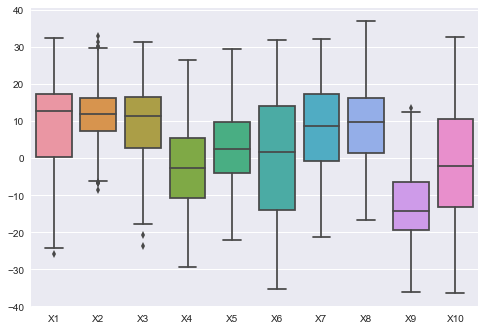

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(ds2)

<b>c) Someone suggests that the observations are really from
multiple different files and were accidentally joined into one larger
data set.  Does anything about the data set suggest this?  If so, how
many different sources/file do you think there are?</b>

I believe the data comes from 7 data sources. Based on the different means and quartile distributions(25%,50%,75%) shown in the boxplot above.

<b>d) Bonus points:  If you think there are more than one source in ds2,
can you assign each observation to the right source (based on the
number of sources you identified in 2c)?</b>

1- X1,X7<br>
2- X2<br>
3- X3,X8<br>
4- X4<br>
5- X5<br>
6- X6,X10<br>
7- X9